# Exploratory Data Analysis for Lending Club Case Study

<a id=section1></a>
### 1. Problem Statement 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### 2. Data Loading and Description <a id=section2></a>

<a id=section201></a> Dataset contains the complete loan data for all loans issued through the time period 2007 to 2011. There is no transactional history of those applicants whose loan is rejected by the company and so this data is not available with the company (and thus in this dataset).  __https://github.com/nazneenansari/dataset/blob/master/Data_Dictionary.xlsx?raw=true__


#### Importing packages                

In [105]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install pandas_profiling

In [106]:
#Import libraries 
import sys                                                                      
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mp
import pandas_profiling as pp
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show, figure
import warnings    # Ignore warning related to pandas_profiling
%matplotlib inline                                                             
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', 100)   # Display all dataframe columns in outputs                                                                                                               
pd.options.display.min_rows = 150    
    

In [107]:
pd.__version__

'1.5.3'

In [108]:
sns.__version__

'0.12.2'

In [109]:
mp.__version__

'3.7.0'

In [110]:
pp.__version__

'3.6.6'

In [111]:
np.__version__

'1.23.5'

#### Importing the Dataset

In [112]:
loan_data= pd.read_csv('loan.csv')   # Importing dataset using pd.read_csv. Read from Git location

### 3. Data Profiling <a id=section3></a>

### 3.1. Understanding the Dataset <a id=section301></a>

In [113]:
loan_data.shape

(39717, 111)

Loan data has __39717 rows__ and __111 columns.__

In [114]:
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

In [115]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolida

In [116]:
loan_data.info()                                         # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [117]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [118]:
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### 3.2. Pre Profiling <a id=section302></a>

In [119]:
#profile = pp.ProfileReport(loan_data)
#profile.to_file("loan_data_before_preprocessing.html")

### 3.3. Data Cleaning and Manipulation <a id=section303></a>

#### 3.3.1. Data Cleaning


__a. Drop columns which have all the rows(39717) as null or NA__

In [120]:
loan_column_drop = []
obj = loan_data.isnull().sum()
for key,value in obj.iteritems():
    if(value == 39717):  # all null ,NA or 0
        #print(key,",",value)
        loan_column_drop.append(f'{key}')
print(loan_column_drop)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [121]:
loan_data.drop(loan_column_drop, axis = 1,inplace = True) # dropped null columns

__b. Drop rows with duplicate id__

In [122]:
duplicate_rows=loan_data[loan_data.duplicated(['id'])]
duplicate_rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


__No duplicate__ records with same id 

__c. Drop Invalid data where loan amount is less than funded amount__

In [123]:
invalid_data= loan_data[loan_data['loan_amnt'] < loan_data['funded_amnt']]
invalid_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [124]:
invalid_data= loan_data[loan_data['funded_amnt'] < loan_data['funded_amnt_inv']]
invalid_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


No data with invalid scenario found.

__d. Drop columns which have least distintive values__

In [125]:
loan_data.drop(['delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type',
                'policy_code','tax_liens','collections_12_mths_ex_med','pymnt_plan', 'initial_list_status'], 
               axis = 1,inplace = True) 

__d. Drop columns not useful for the analysis__

In [126]:
loan_data.drop(['id','member_id','title','emp_title','zip_code','last_credit_pull_d','url',
                'desc','next_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv'],
               axis = 1,inplace = True) 

__e. Drop Customer Behavioural variables__

In [127]:
loan_data.drop(['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',], axis = 1,inplace = True)

In [128]:
loan_data.shape

(39717, 20)

Loan data has __39717 rows__ and __20 columns.__

In [129]:
loan_data.isnull().sum() # check if more column needs to be dropped 

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
open_acc                   0
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

#### 3.3.2. Data Manipulation and Standardization

__a. Extract number of months from term column__

In [130]:
loan_data.term = loan_data.term.apply(lambda x: x.rstrip('months'))

__b. Extract number of years from emp_length column__

Assumptions
1. emp_length : <1 years is assumed to be 1 years and 10+ is assumed 10 years
2. emp_length with nan is replaced with mode 

In [131]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0],inplace=True)
loan_data.emp_length = loan_data.emp_length.str.extract('(\d+)')

In [132]:
loan_data.emp_length.isna().sum()

0

__c. Extract numeric value for interest rate and revolving util__

In [133]:
loan_data.int_rate = loan_data.int_rate.str.rstrip('%')

__d. Extract month and year as seperate columns__

In [134]:
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['year']=loan_data['issue_d'].dt.year
loan_data['month']=loan_data['issue_d'].dt.month

__e. Remove loan status as Current because analysis to find defaulters is limited to Fully paid and Charged Off__

In [135]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.shape

(38577, 22)

__f. Convert amounts and interest rates colums to numeric values__

In [136]:
numeric_columns = ['loan_amnt','funded_amnt','term','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length',
                   'pub_rec_bankruptcies']
loan_data[numeric_columns] = loan_data[numeric_columns].apply(pd.to_numeric)

__g. Outliers Treatment__


__i. Annual Income__

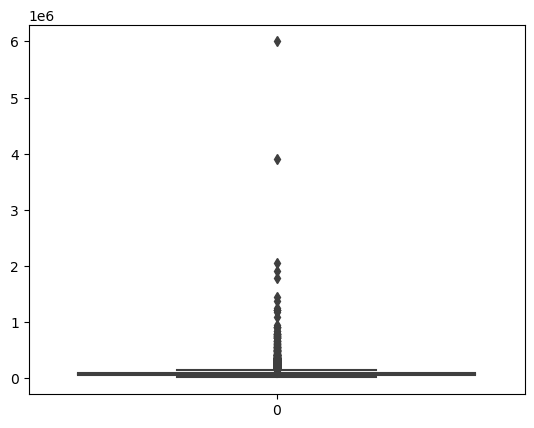

In [137]:
sns.boxplot(loan_data['annual_inc'])
plt.show()

In [138]:
annual_inc_quantile = loan_data.annual_inc.quantile([0.5, 0.10, 0.75, 0.85, 0.90, 0.95, 0.97,0.98, 0.99])
annual_inc_quantile

0.50     58868.0
0.10     30000.0
0.75     82000.0
0.85    100000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [139]:
per_90_annual_inc = loan_data['annual_inc'].quantile(0.90)
loan_data = loan_data[loan_data.annual_inc <= per_90_annual_inc]

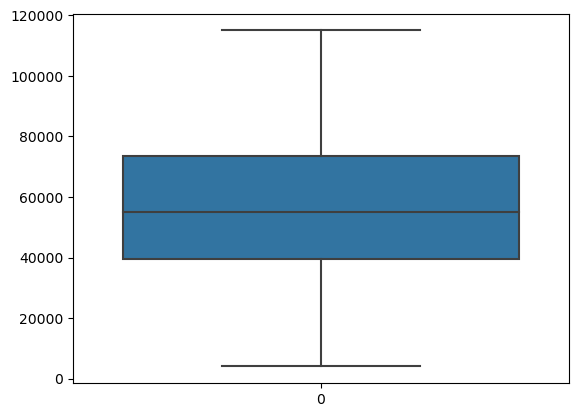

In [140]:
sns.boxplot(loan_data['annual_inc'])
plt.show()

__ii. Interest Rate__

In [141]:
int_rate_quantile = loan_data.int_rate.quantile([0.5, 0.10, 0.75, 0.85, 0.90, 0.95, 0.97,0.98, 0.99])
int_rate_quantile

0.50    11.71
0.10     6.99
0.75    14.27
0.85    15.95
0.90    16.77
0.95    18.25
0.97    19.03
0.98    19.74
0.99    20.89
Name: int_rate, dtype: float64

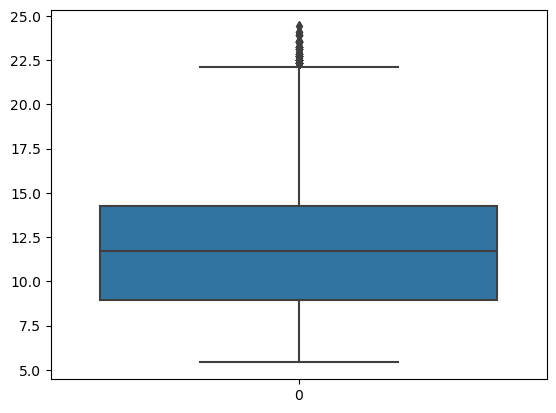

In [142]:
sns.boxplot(loan_data['int_rate'])
plt.show()

__iii. Loan Amount__

In [143]:
loan_amnt_quantile = loan_data.loan_amnt.quantile([0.5, 0.10, 0.75, 0.85, 0.90, 0.95, 0.97,0.98, 0.99])
loan_amnt_quantile

0.50     9000.0
0.10     3000.0
0.75    14400.0
0.85    17692.5
0.90    20000.0
0.95    25000.0
0.97    25000.0
0.98    28000.0
0.99    33989.0
Name: loan_amnt, dtype: float64

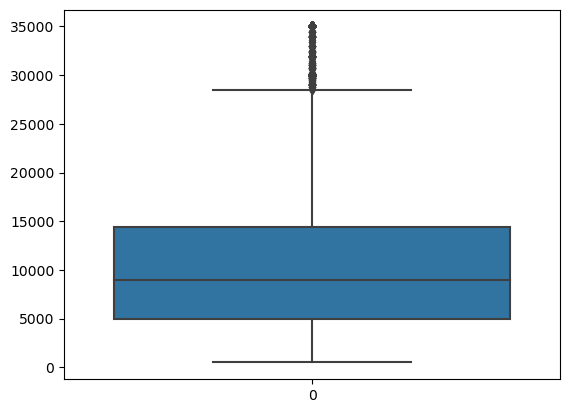

In [144]:
sns.boxplot(loan_data['loan_amnt'])
plt.show()

__h. Check correlation between the quantitative parameters__

In [145]:
loan_data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,total_acc,pub_rec_bankruptcies,year,month
loan_amnt,1.000000,0.982291,0.936331,0.351916,0.282924,0.931608,0.131120,0.393836,0.102209,0.162433,0.234436,-0.027754,0.102693,0.049667
funded_amnt,0.982291,1.000000,0.954051,0.332707,0.289028,0.956588,0.130371,0.390836,0.101362,0.160275,0.228701,-0.028244,0.114232,0.039886
funded_amnt_inv,0.936331,0.954051,1.000000,0.352930,0.282548,0.900918,0.144025,0.373636,0.108938,0.148768,0.222506,-0.033591,0.249915,0.066627
term,0.351916,0.332707,0.352930,1.000000,0.431251,0.094231,0.101791,0.083244,0.079034,0.043794,0.094984,0.017847,0.233770,0.030464
int_rate,0.282924,0.289028,0.282548,0.431251,1.000000,0.263064,-0.016549,0.045846,0.106015,-0.017135,-0.073867,0.087978,0.032898,0.025990
installment,0.931608,0.956588,0.900918,0.094231,0.263064,1.000000,0.101101,0.388078,0.090797,0.155635,0.204959,-0.024946,0.045517,0.027243
emp_length,0.131120,0.130371,0.144025,0.101791,-0.016549,0.101101,1.000000,0.167270,0.053740,0.082793,0.199870,0.077404,0.134969,0.025475
annual_inc,0.393836,0.390836,0.373636,0.083244,0.045846,0.388078,0.167270,1.000000,-0.047360,0.266317,0.382528,0.002561,0.040842,0.013378
dti,0.102209,0.101362,0.108938,0.079034,0.106015,0.090797,0.053740,-0.047360,1.000000,0.301289,0.252523,0.002371,0.094549,0.018212
open_acc,0.162433,0.160275,0.148768,0.043794,-0.017135,0.155635,0.082793,0.266317,0.301289,1.000000,0.683065,0.011820,0.011480,0.000773


<Axes: >

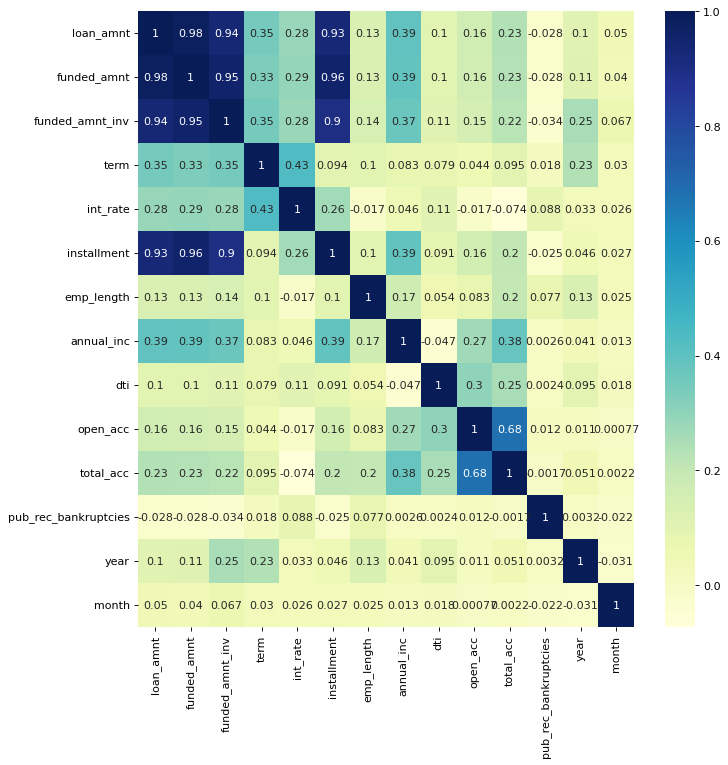

In [146]:
figure(figsize=(10,10),dpi=80)
sns.heatmap(loan_data.corr(), cmap="YlGnBu", annot=True)


### 3.4. Post Pandas Profiling <a id=section304></a>

In [147]:
#profile = pp.ProfileReport(loan_data)
#profile.to_file("loan_data_after_preprocessing.html")

### 3.5. Creating Bins for Quantitative Variables <a id=section305></a>

__a. Check min / max and create bins for Interest Rate__

In [148]:
loan_data.int_rate.max()

24.4

In [149]:
loan_data.int_rate.min()

5.42

In [150]:
#Creating bin in range 5-25
bins = [5,10,15,20,25]
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'],
                                       bins=bins,
                                       labels=['5%-10%','10%-15%','15%-20%','20%-25%'])

In [151]:
loan_data['int_rate_groups'].unique()

['10%-15%', '15%-20%', '5%-10%', '20%-25%']
Categories (4, object): ['5%-10%' < '10%-15%' < '15%-20%' < '20%-25%']

__b. Check min / max and create bins for Annual Income__

In [152]:
loan_data.annual_inc.max()

115000.0

In [153]:
loan_data.annual_inc.min()

4000.0

In [154]:
bins_inc = [4,15,30,45,60,75,90,115]
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=7,
                                        labels=['0-15k','15k-30k','30k-45k','45k-60k','60k-75k','75k-90k','90k-115k'] )

In [155]:
loan_data['annual_inc_groups'].unique()

['15k-30k', '0-15k', '30k-45k', '60k-75k', '90k-115k', '75k-90k', '45k-60k']
Categories (7, object): ['0-15k' < '15k-30k' < '30k-45k' < '45k-60k' < '60k-75k' < '75k-90k' < '90k-115k']

__c. Check min / max and create bins for Loan Amount__

In [156]:
loan_data.funded_amnt_inv.max()

35000.0

In [157]:
loan_data.funded_amnt_inv.max()

35000.0

In [158]:
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,
                                            labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 

In [159]:
loan_data['funded_amnt_inv_group'].unique()

['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '30k-35k', '25k-30k']
Categories (7, object): ['0-5k' < '5k-10k' < '10k-15k' < '15k-20k' < '20k-25k' < '25k-30k' < '30k-35k']

__d. Check min / max and create bins for DTI__

In [160]:
loan_data.dti.max()

29.99

In [161]:
loan_data.dti.min()

0.0

In [162]:
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5, precision =0, labels=['0-6','6-12','12-18','18-24','24-30'])

In [163]:
loan_data['dti_groups'].unique()

['24-30', '0-6', '6-12', '18-24', '12-18']
Categories (5, object): ['0-6' < '6-12' < '12-18' < '18-24' < '24-30']

__e. Define custom method to annotate graph__

In [164]:
def annotate(ax):
    for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9))
    return

### 4. Data Analysis <a id=section4></a>

### 4.1.  <a id=section401></a>  Loan Status Distribution

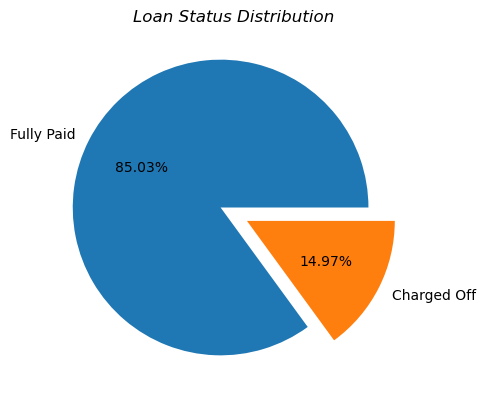

In [165]:
fig,ax =plt.subplots()
explode = (0.1, 0.1)
loan_status_label = ['Fully Paid', 'Charged Off']
ax.pie(loan_data['loan_status'].value_counts(), explode=explode, labels = loan_status_label, 
       autopct='%1.2f%%')

# displaying the title
plt.title(label="Loan Status Distribution",
          loc="center",
          fontstyle='italic')
fig.savefig('Loan Status Distribution.png', dpi=100)
plt.show()

__14.97%__ loans out of total loans are Charged Off


### 4.2.  <a id=section402></a>Verification Status v/s Loan Status

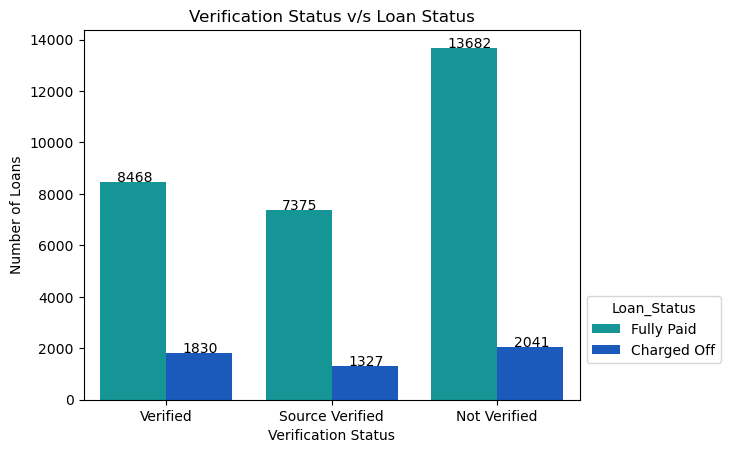

In [166]:
fig,ax =plt.subplots()
ax= sns.countplot(data = loan_data, x = 'verification_status', hue='loan_status', palette='winter_r')
annotate(ax)
ax.legend(title= 'Loan_Status', bbox_to_anchor =(1.0, 0.3), ncol = 1)
ax.set(xlabel='Verification Status', ylabel='Number of Loans')
plt.title('Verification Status v/s Loan Status')
fig.savefig('Verification Status - Loan Status.png', dpi=100)
plt.show()

Loans that are __Not Verified__ tend to charged off.

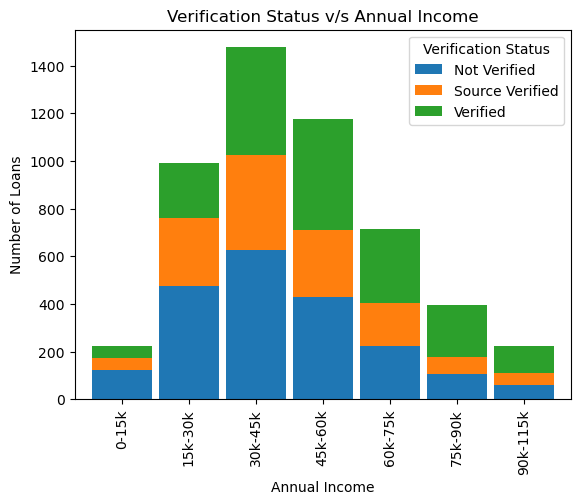

In [167]:
df2 = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby(['annual_inc_groups','verification_status']).size().reset_index().pivot(columns='verification_status', index='annual_inc_groups' , values=0).fillna(0)
ax = df2.plot( kind = "bar" , stacked=True , sort_columns =True ,width=0.9)
ax.legend(title= 'Verification Status')
ax.set(xlabel='Annual Income', ylabel='Number of Loans')
plt.title('Verification Status v/s Annual Income')
fig = ax.get_figure()
fig.savefig('Verification Status - Annual Income.png', dpi=100)
plt.show()

People with __annual income__ between __30k-45k__ with verification status as __Not Verified__ tend to default.

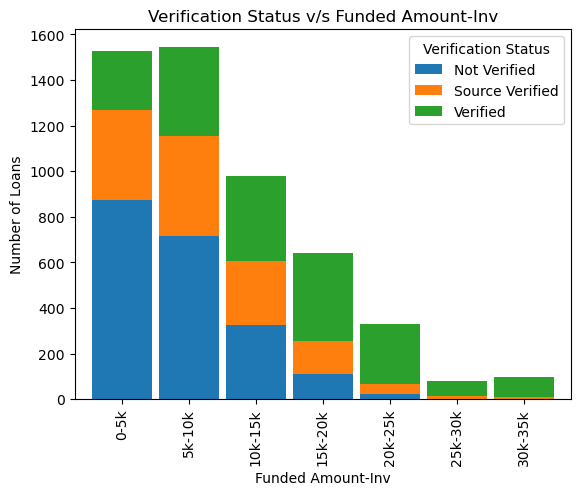

In [168]:
df2 = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby(['funded_amnt_inv_group','verification_status']).size().reset_index().pivot(columns='verification_status', index='funded_amnt_inv_group' , values=0).fillna(0)
ax = df2.plot( kind = "bar" , stacked=True , sort_columns =True ,width=0.9)
ax.legend(title= 'Verification Status')
ax.set(xlabel='Funded Amount-Inv', ylabel='Number of Loans')
plt.title('Verification Status v/s Funded Amount-Inv')
fig = ax.get_figure()
fig.savefig('Verification Status - Funded Amount-Inv.png', dpi=100)
plt.show()

People who got __amount funded by investors__ between __0-5k__ and verification status as __Not Verified__ tend to default.

### 4.3.  <a id=section403></a> Home Ownership v/s Loan Status?

In [169]:
loan_data.home_ownership.value_counts()

RENT        17546
MORTGAGE    14335
OWN          2750
OTHER          90
NONE            2
Name: home_ownership, dtype: int64

In [170]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

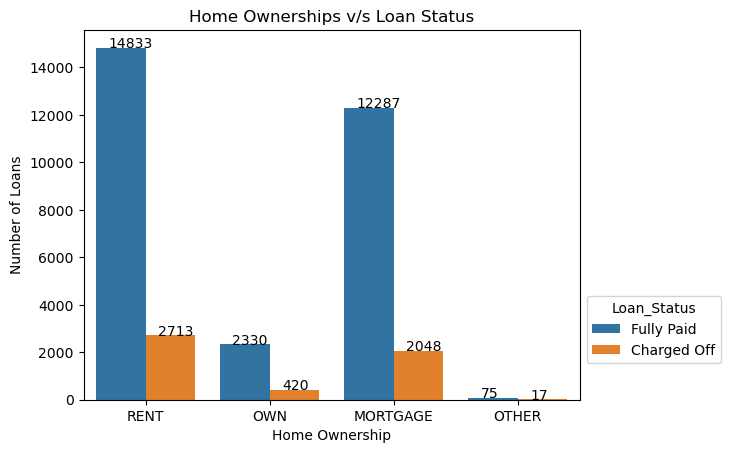

In [171]:
fig,ax =plt.subplots()
ax= sns.countplot(data = loan_data, x = 'home_ownership', hue='loan_status')
annotate(ax)
ax.legend(title= 'Loan_Status', bbox_to_anchor =(1.0, 0.3), ncol = 1)
ax.set(xlabel='Home Ownership', ylabel='Number of Loans')
plt.title('Home Ownerships v/s Loan Status')
fig.savefig('Home Ownership - Loan Status.png', dpi=100)
plt.show()

People having __rented home__ tend to charged off, followed by ones having home ownership as __Mortgage.__

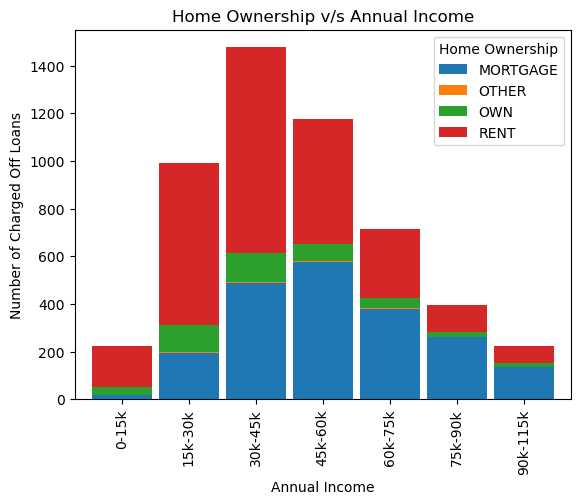

In [172]:
df2 = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby(['annual_inc_groups','home_ownership']).size().reset_index().pivot(columns='home_ownership', index='annual_inc_groups' , values=0).fillna(0)
ax = df2.plot( kind = "bar" , stacked=True , sort_columns =True ,width=0.9)
ax.legend(title= 'Home Ownership')
ax.set(xlabel='Annual Income', ylabel='Number of Charged Off Loans')
plt.title('Home Ownership v/s Annual Income')
fig = ax.get_figure()
fig.savefig('Home Ownership - Annual Income.png', dpi=100)
plt.show()

People with __Annual Income__ between __30k-45k__ staying in __Rented Accomodation__ , followed by peoplw with __Annual Income__ betwwen __45k-60k__ having __Mortgage__ home ownership.

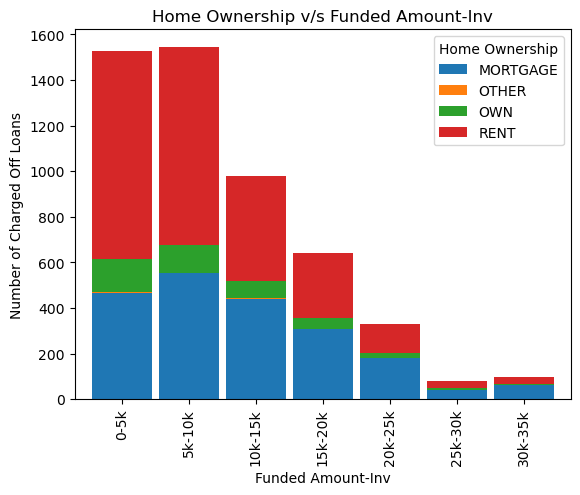

In [173]:
df2 = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby(['funded_amnt_inv_group','home_ownership']).size().reset_index().pivot(columns='home_ownership', index='funded_amnt_inv_group' , values=0).fillna(0)
ax = df2.plot( kind = "bar" , stacked=True , sort_columns =True ,width=0.9)
ax.legend(title= 'Home Ownership')
ax.set(xlabel='Funded Amount-Inv', ylabel='Number of Charged Off Loans')
plt.title('Home Ownership v/s Funded Amount-Inv')
fig = ax.get_figure()
fig.savefig('Home Ownership - Funded Amount-Inv.png', dpi=100)
plt.show()

People with __Mortgage__ home ownership tend to default with loan amount between __5k-10k__, whereas people with __Rent__ home ownership default with loan amount between __0-5k.__

### 4.4.  <a id=section404></a> Loan Purpose v/s Loan Status

In [174]:
loan_data.purpose.value_counts()
charged_off = loan_data[loan_data['loan_status'] == 'Charged Off']

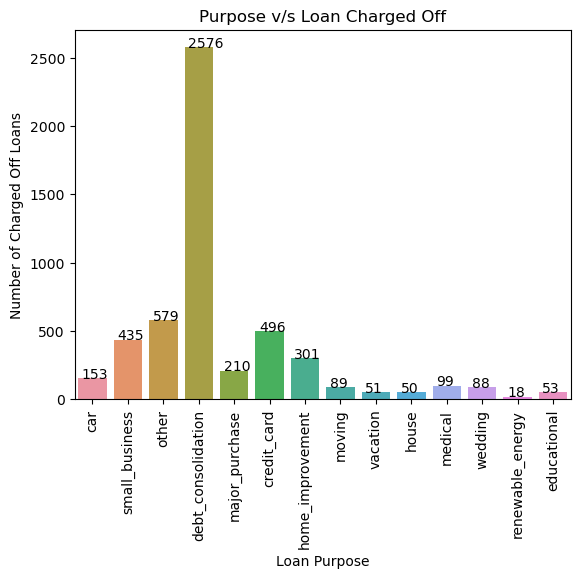

In [175]:
fig,ax =plt.subplots()
ax = sns.countplot(data = charged_off, x = 'purpose')
ax.set(xlabel='Loan Purpose', ylabel='Number of Charged Off Loans')
annotate(ax)
plt.title('Purpose v/s Loan Charged Off')
plt.xticks( rotation='vertical')
fig = ax.get_figure()
fig.savefig('Purpose - Loan Charged Off.png', dpi=100)
plt.show()

Loan Charged off is exceptionally high when loan is taken for __debt consolidation.__

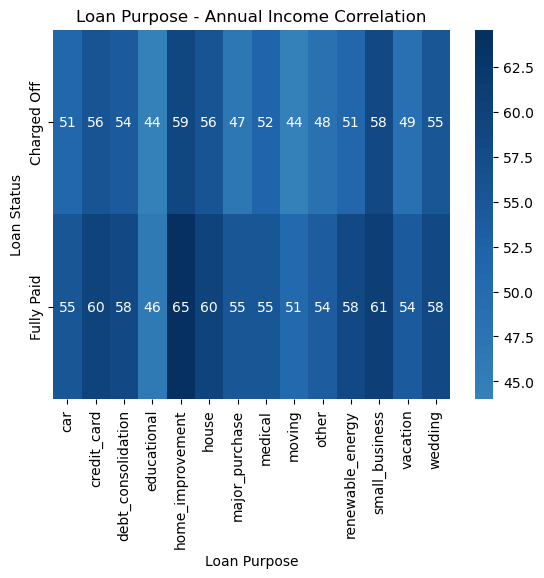

In [176]:
loan_data['annual_inc_scaled'] = loan_data['annual_inc']/1000
result = pd.pivot_table(data=loan_data, index='loan_status', columns='purpose',values='annual_inc_scaled')
ax = sns.heatmap(result, annot=True, cmap = 'RdBu', center=0.117)
ax.set(xlabel='Loan Purpose', ylabel='Loan Status')
plt.title('Loan Purpose - Annual Income Correlation')
plt.xticks( rotation='vertical')
fig = ax.get_figure()
fig.savefig('Loan Purpose - Annual Income Correlation.png', dpi=100)
plt.show() # Remove 

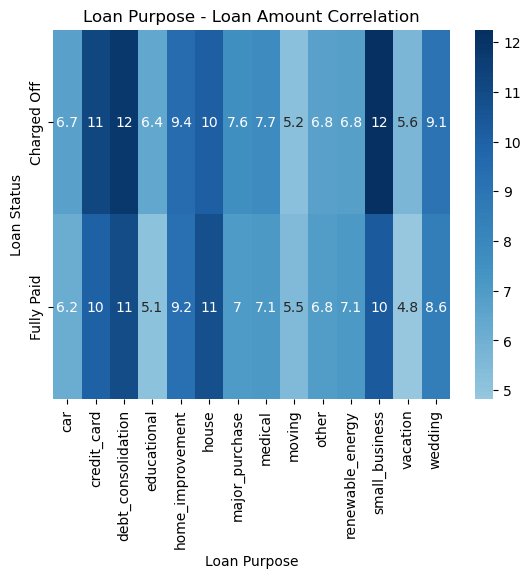

In [177]:
loan_data['funded_amnt_inv_scaled'] = loan_data['funded_amnt_inv']/1000
result = pd.pivot_table(data=loan_data, index='loan_status', columns='purpose',values='funded_amnt_inv_scaled')
ax = sns.heatmap(result, annot=True, cmap = 'RdBu', center=0.117)
ax.set(xlabel='Loan Purpose', ylabel='Loan Status')
plt.title('Loan Purpose - Loan Amount Correlation')
plt.xticks( rotation='vertical')
fig = ax.get_figure()
fig.savefig('Loan Purpose - Loan Amount Correlation.png', dpi=100)
plt.show()

From the above two graphs, the number of loans borrowed for __home improvement and small business__ with the annual income around __59k and 58k__ respectively contribute to defaulters. Similarly, the number of loans borrowed for __debt consolidation and small business__ with the funded loan amount around __12k__ tend to Charged Off.

### 4.5.  <a id=section405></a>  Issued Year/Month v/s Loan Status

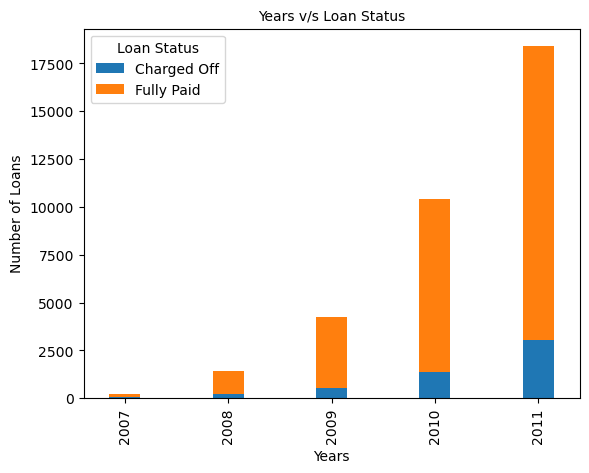

In [178]:
df2 = loan_data.groupby(['year','loan_status']).size().reset_index().pivot(columns='loan_status', index='year' , values=0).fillna(0)
ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.3)
ax.legend(title= 'Loan Status')
ax.set(xlabel='Years', ylabel='Number of Loans')
plt.title('Years v/s Loan Status' , fontsize=10)
fig = ax.get_figure()
fig.savefig('Years - Loan Status.png', dpi=100)
plt.show()

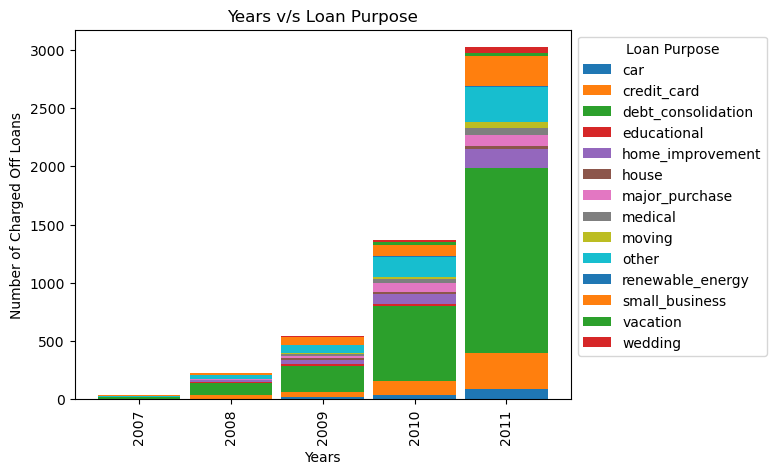

In [179]:
df2 = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby(['year','purpose']).size().reset_index().pivot(columns='purpose', index='year' , values=0).fillna(0)
ax = df2.plot( kind = "bar" , stacked=True , sort_columns =True ,width=0.9)
ax.set(xlabel='Years', ylabel='Number of Charged Off Loans')
ax.legend(title= 'Loan Purpose', bbox_to_anchor =(1.0, 1.0), ncol = 1)
plt.title('Years v/s Loan Purpose')
fig = ax.get_figure()
fig.savefig('Years - Loan Purpose.png', dpi=100)
plt.show()

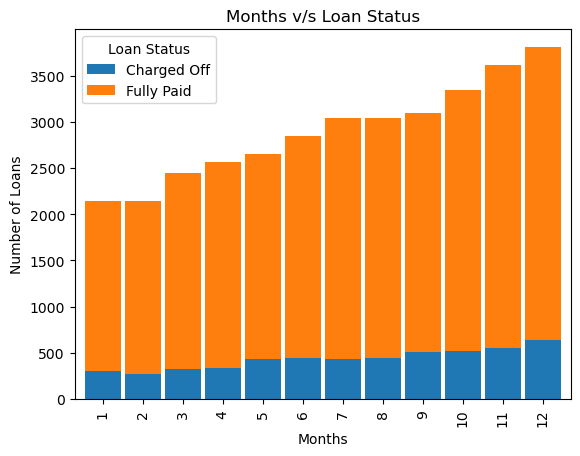

In [180]:
df2 = loan_data.groupby(['month','loan_status']).size().reset_index().pivot(columns='loan_status', index='month' , values=0).fillna(0)
ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.9)
ax.legend(title= 'Loan Status')
ax.set(xlabel='Months', ylabel='Number of Loans')
plt.title('Months v/s Loan Status' )
fig = ax.get_figure()
fig.savefig('Months - Loan Status.png', dpi=100)
plt.show()

- We see increase in Charged off loans from the period __2008 to 2011.__ The possible reason could be The Great Recession which hit the U.S. economy back in 2008. __The Great Recession refers to the economic downturn from 2007 to 2009 after the bursting of the U.S. housing bubble and the global financial crisis.__ The number of Charged Off loans for debt consolidation started increasing drastically from 2008 onwards.

### 4.6.  <a id=section406></a>  Term v/s Interest Rate

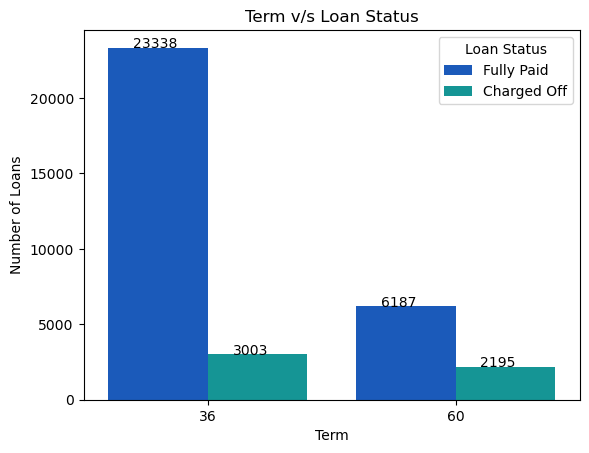

In [181]:
ax = sns.countplot(x="term",data=loan_data,hue='loan_status',palette='winter')
annotate(ax)
ax.legend(title= 'Loan Status')
ax.set(xlabel='Term', ylabel='Number of Loans')
plt.title('Term v/s Loan Status' )
fig = ax.get_figure()
fig.savefig('Term - Loan Status.png', dpi=100)
plt.show()

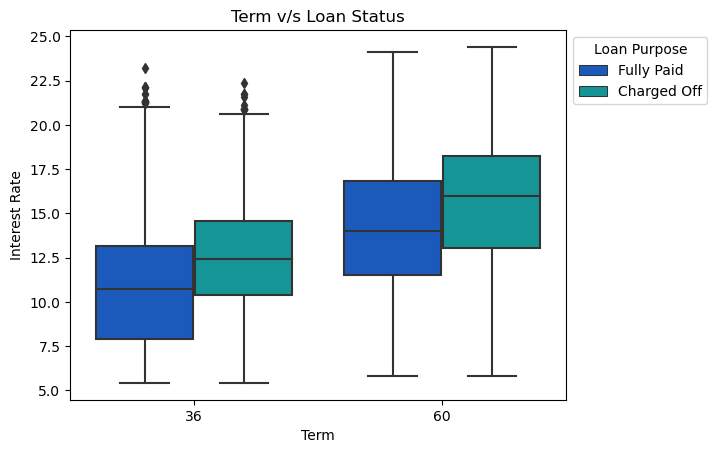

In [182]:
ax = sns.boxplot(x='term', y="int_rate" ,data=loan_data,hue='loan_status',palette='winter')
ax.legend(title= 'Loan Status')
ax.set(xlabel='Term', ylabel='Interest Rate')
ax.legend(title= 'Loan Purpose', bbox_to_anchor =(1.0, 1.0), ncol = 1)
plt.title('Term v/s Loan Status' )
fig = ax.get_figure()
fig.savefig('Term - Loan Status.png', dpi=100)
plt.show()

From the above two plots, it is evident that loans with __lower term (36 months) and lower interest rate (~ 12.5%)__ tend to default comparitively.

### 4.7.  <a id=section407></a> Employment Length v/s Loan Status

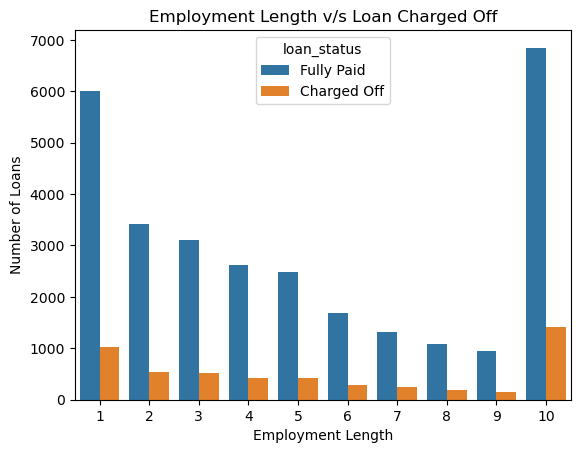

In [183]:
fig,ax =plt.subplots()
ax= sns.countplot(data = loan_data, x = 'emp_length', hue= 'loan_status')
ax.set(xlabel='Employment Length', ylabel='Number of Loans')
plt.title('Employment Length v/s Loan Charged Off')
fig = ax.get_figure()
fig.savefig('Employment Length - Loan Charged Off.png', dpi=100)
plt.show()

People with __10+ years__ of employment tend to charge off.

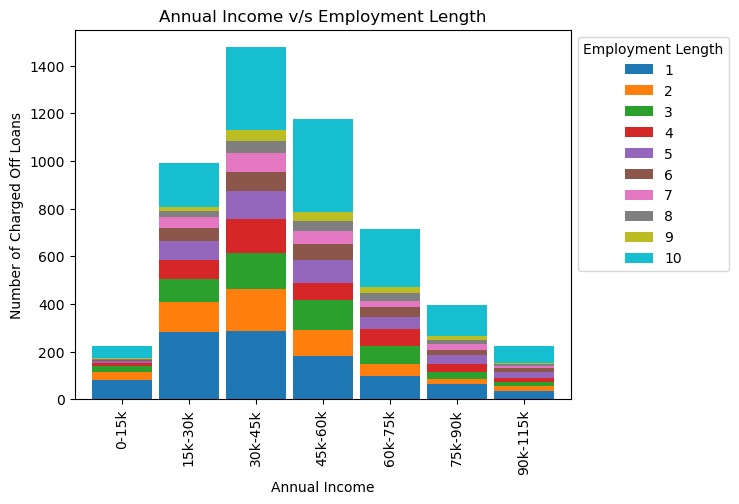

In [184]:
df2 = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby(['annual_inc_groups','emp_length']).size().reset_index().pivot(columns='emp_length', index='annual_inc_groups' , values=0).fillna(0)
ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.9)
ax.legend(title= 'Employment Length', bbox_to_anchor =(1.0, 1.0), ncol = 1)
ax.set(xlabel='Annual Income', ylabel='Number of Charged Off Loans')
plt.title('Annual Income v/s Employment Length')
fig = ax.get_figure()
fig.savefig('Annual Income - Employment Length.png', dpi= 500)
plt.show()

Borrowers with __10+ years__ of work experience and __annual income__ in the range of __45k-60k__ tend to default.However, it is also visible that there are considerable number of people with __1 or less year__ of work experience and __annual income__ in the range of __15k-45k__ who contribute to defaulters list.

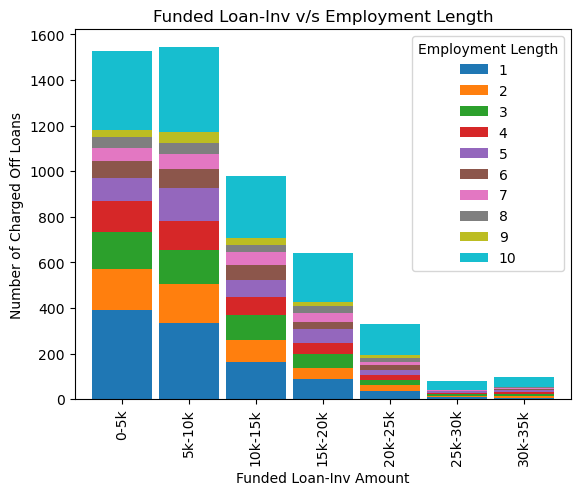

In [185]:
df2 = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby(['funded_amnt_inv_group','emp_length']).size().reset_index().pivot(columns='emp_length', index='funded_amnt_inv_group' , values=0).fillna(0)
ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.9)
ax.legend(title= 'Employment Length', bbox_to_anchor =(1.0, 1.0), ncol = 1)
ax.set(xlabel='Funded Loan-Inv Amount', ylabel='Number of Charged Off Loans')
plt.title('Funded Loan-Inv v/s Employment Length')
fig = ax.get_figure()
fig.savefig('Funded Loan-Inv - Employment Length.png', dpi=100)
plt.show()

Borrowers with __10+ years__ of work experience and __funded loan amount__ in the range of __5k-10k__ tend to default. Also, people with __1 or less year__ of work experience and __funded loan amount__ in the range of __0k-5k__ contribute to defaulters list.

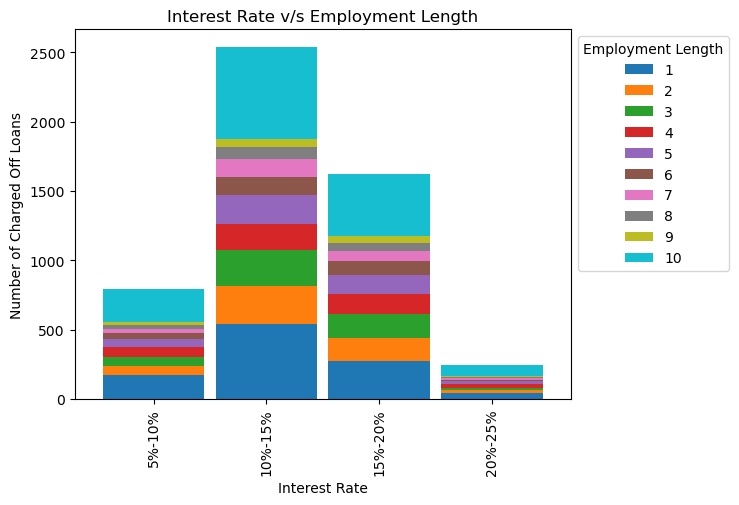

In [186]:
df2 = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby(['int_rate_groups','emp_length']).size().reset_index().pivot(columns='emp_length', index='int_rate_groups' , values=0).fillna(0)
ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.9)
ax.legend(title= 'Employment Length', bbox_to_anchor =(1.0, 1.0), ncol = 1)
ax.set(xlabel='Interest Rate', ylabel='Number of Charged Off Loans')
plt.title('Interest Rate v/s Employment Length')
fig = ax.get_figure()
fig.savefig('Interest Rate - Employment Length.png', dpi=100)
plt.show()

Loan with __interest rate__ between __10%-15%__, borrowed by people with employment length of either __less than or upto 1 year or 10 years or more__ tend to Charged Off.

### 4.8.  <a id=section408></a> Grade/Sub-Grade v/s Loan Status

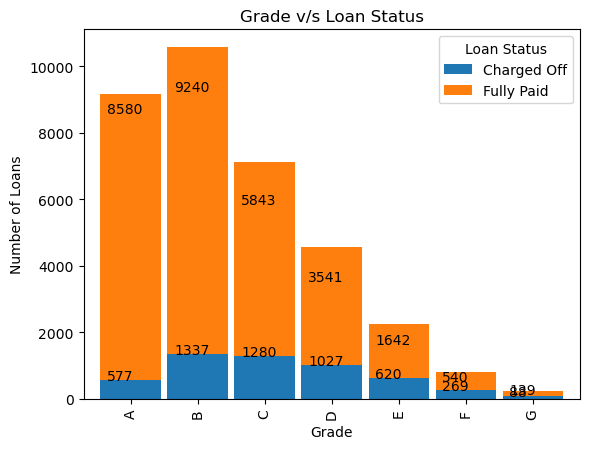

In [187]:
df2 = loan_data.groupby(['grade','loan_status']).size().reset_index().pivot(columns='loan_status', index='grade' , values=0).fillna(0)
ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.9)
annotate(ax)
ax.legend(title= 'Loan Status', bbox_to_anchor =(1.0, 1.0), ncol = 1)
ax.set(xlabel='Grade', ylabel='Number of Loans')
plt.title('Grade v/s Loan Status')
fig = ax.get_figure()
fig.savefig('Grade - Loan Status.png', dpi=100)
plt.show()

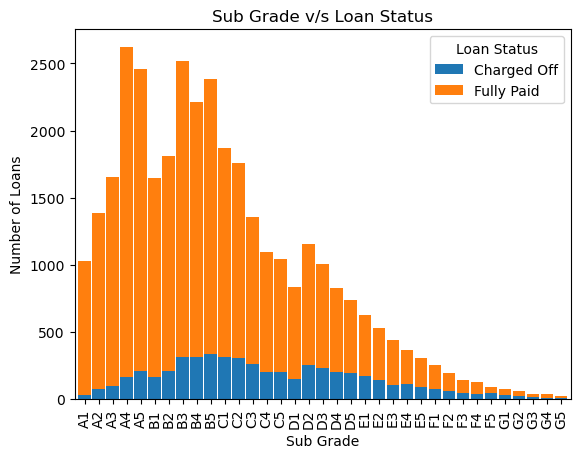

In [188]:
df2 = loan_data.groupby(['sub_grade','loan_status']).size().reset_index().pivot(columns='loan_status', index='sub_grade' , values=0).fillna(0)
ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.9)
ax.legend(title= 'Loan Status', bbox_to_anchor =(1.0, 1.0), ncol = 1)
ax.set(xlabel='Sub Grade', ylabel='Number of Loans')
plt.title('Sub Grade v/s Loan Status')
fig = ax.get_figure()
fig.savefig('Sub Grade - Loan Status.png', dpi=100)
plt.show()

From the above two plots, it can be deduced that Loan with __grade B and sub-grade B5__ comparatively Charged Off more.

### 4.9.  <a id=section409></a> State v/s Loan Status

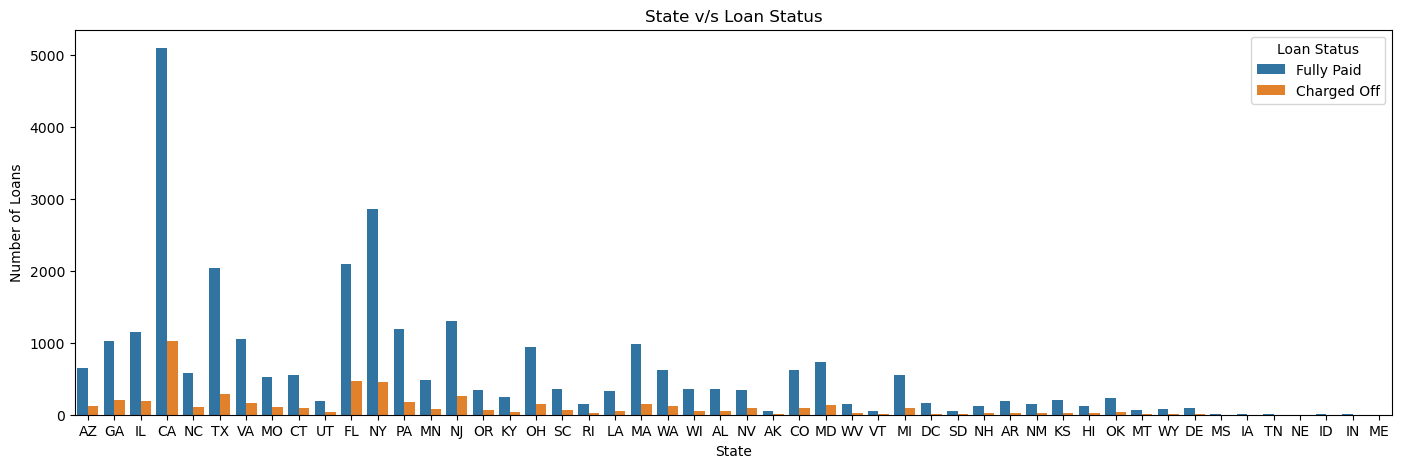

In [189]:
plt.figure(figsize=(17,5))
ax=sns.countplot(x='addr_state', hue='loan_status', data=loan_data)
ax.legend(title= 'Loan Status')
ax.set(xlabel='State', ylabel='Number of Loans')
plt.title('State v/s Loan Status')
fig = ax.get_figure()
fig.savefig('State - Loan Status.png', dpi=100)
plt.show()

__Maximum loan__ is borrowed by the people living in __California(CA), followed by New York(NY), Florida(FL), Texas(TX) and New Jersey(NJ).__ The __charged off proportion__ is also in the __same order of the  loan borrowed__ for these states.

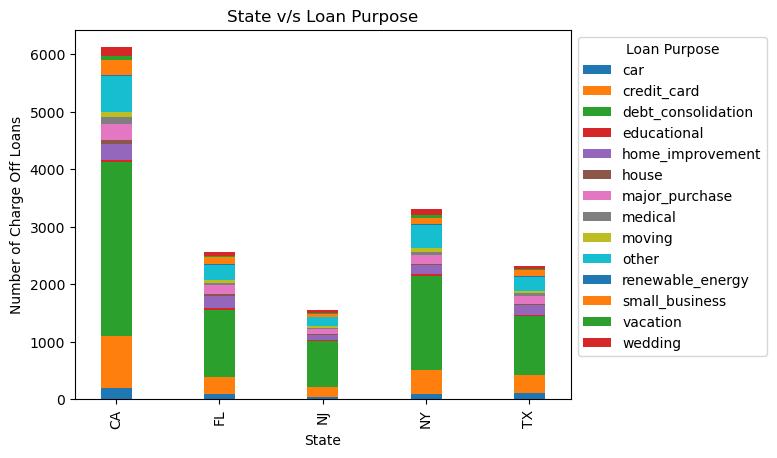

In [190]:
df1 = loan_data[loan_data['loan_status']== 'Charged Off'].groupby(['addr_state'])['addr_state'].size().nlargest(5)
df2 = loan_data[loan_data['addr_state'].isin(dict(df1).keys())].groupby(['addr_state','purpose']).size().reset_index().pivot(columns='purpose', index='addr_state' , values=0).fillna(0)
ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.3)
ax.legend(title= 'Loan Purpose', bbox_to_anchor =(1.0, 1.0), ncol = 1)
ax.set(xlabel='State', ylabel='Number of Charge Off Loans')
plt.title('State v/s Loan Purpose')
fig = ax.get_figure()
fig.savefig('State - Loan Purpose.png', dpi=100)
plt.show()

People living in the __top 5 states of the U.S.__, which have the maximum number of __Charged Off__ loan, borrowed loan for __debt consolidation.__

### 4.10.  <a id=section410></a> Open-to-Total Account Ratio v/s Loan Status

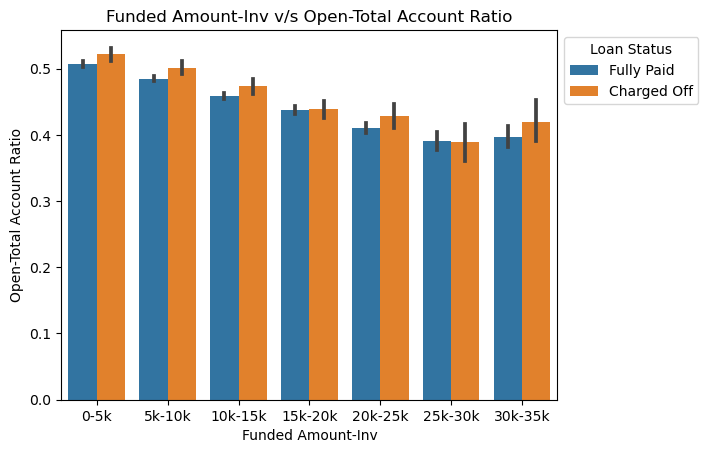

In [191]:
loan_data['opentototalratio'] = loan_data['open_acc']/loan_data['total_acc']
ax=sns.barplot(y = 'opentototalratio', x = 'funded_amnt_inv_group', data = loan_data,hue = 'loan_status')
ax.set(xlabel='Funded Amount-Inv', ylabel='Open-Total Account Ratio')
ax.legend(title= 'Loan Status', bbox_to_anchor =(1.0, 1.0), ncol = 1)
plt.title('Funded Amount-Inv v/s Open-Total Account Ratio')
fig = ax.get_figure()
fig.savefig('Funded Amount-Inv - Open-Total Account Ratio.png', dpi=100)
plt.show()

Charged Off loans are __comparatively higher__ for customers having __Open-to-Total Acount Ratio more than 0.5__, which means a customer having more Open accounts with __funded loan amount__ in the range of __0-5k__ tend to default.

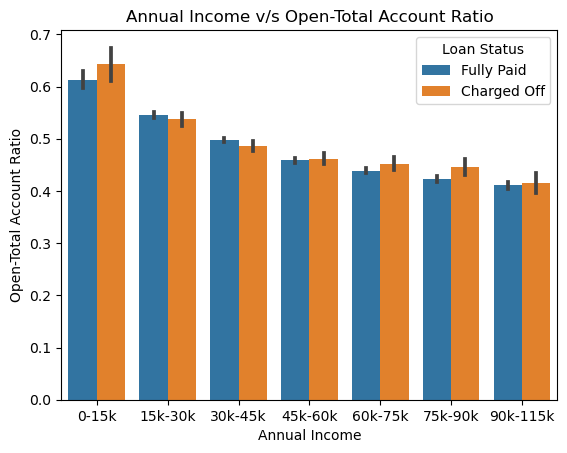

In [192]:
ax=sns.barplot(y = 'opentototalratio', x = 'annual_inc_groups', data = loan_data,hue = 'loan_status')
ax.set(xlabel='Annual Income', ylabel='Open-Total Account Ratio')
ax.legend(title= 'Loan Status', bbox_to_anchor =(1.0, 1.0), ncol = 1)
plt.title('Annual Income v/s Open-Total Account Ratio')
fig = ax.get_figure()
fig.savefig('Annual Income - Open-Total Account Ratio.png', dpi=100)
plt.show()

Charged Off loans are __comparatively higher__ for customers having __Open-to-Total Acount Ratio more than 0.6__, which means a customer having more Open accounts with __annual income__ in the range of __0-15k__ tend to default.

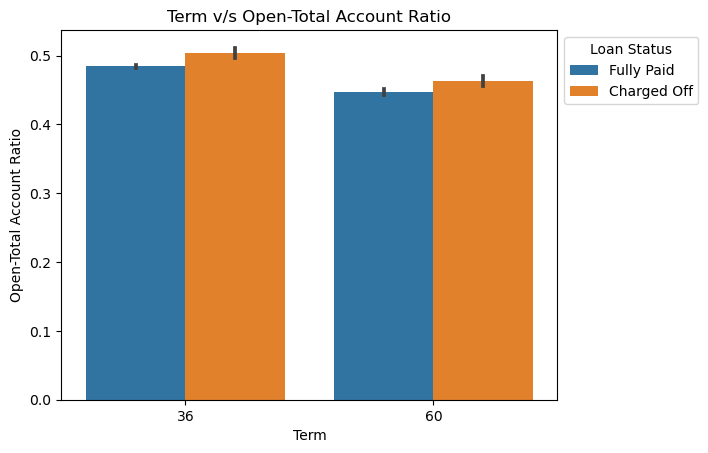

In [193]:
ax=sns.barplot(y = 'opentototalratio', x = 'term', data = loan_data,hue = 'loan_status')
ax.set(xlabel='Term', ylabel='Open-Total Account Ratio')
ax.legend(title= 'Loan Status', bbox_to_anchor =(1.0, 1.0), ncol = 1)
plt.title('Term v/s Open-Total Account Ratio')
fig = ax.get_figure()
fig.savefig('Term - Open-Total Account Ratio.png', dpi=100)
plt.show()

The ratio of Open-to-Total Account is __higher__ for loans with loan term of __36 months.__ The above graph represent that borrowers with __more open accounts__, taking loan for __36 months__ tend to default. 

### 4.11. <a id=section411></a> DTI v/s Loan Status

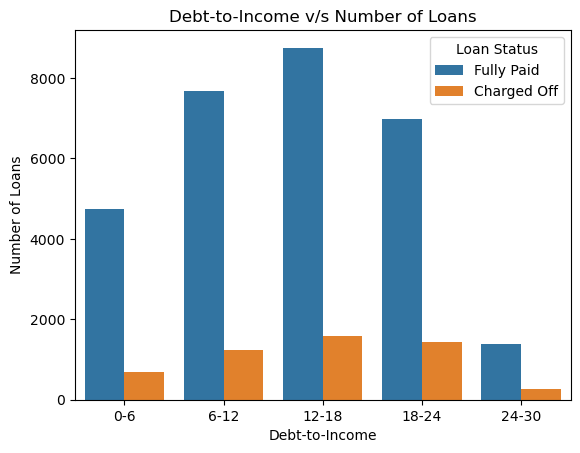

In [194]:
ax=sns.countplot( x = 'dti_groups', data = loan_data,hue = 'loan_status')
ax.set(xlabel='Debt-to-Income', ylabel='Number of Loans')
ax.legend(title= 'Loan Status')
plt.title('Debt-to-Income v/s Number of Loans')
fig = ax.get_figure()
fig.savefig('Debt-to-Income - Number of Loans.png', dpi=100)
plt.show()

The __maximum__ number of Charged Off loans are in the __DTI (debt-to-income)__ range of __12-18.__

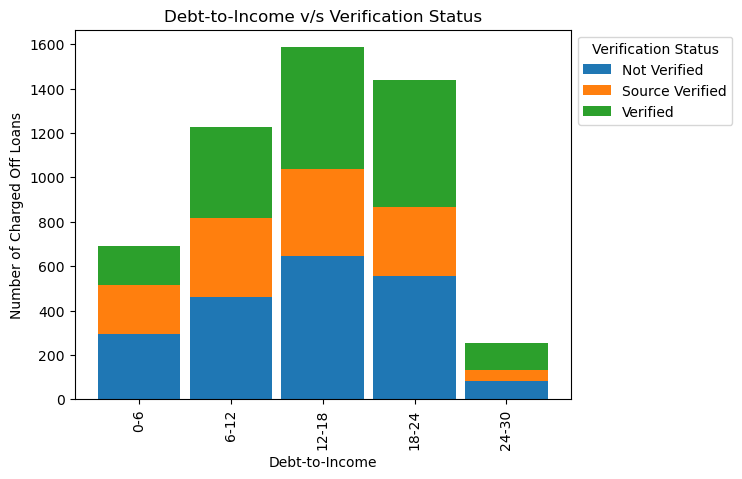

In [195]:
df2 = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby(['dti_groups','verification_status']).size().reset_index().pivot(columns='verification_status', index='dti_groups' , values=0).fillna(0)
ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.9)
ax.set(xlabel='Debt-to-Income', ylabel='Number of Charged Off Loans')
ax.legend(title= 'Verification Status', bbox_to_anchor =(1.0, 1.0), ncol = 1)
plt.title('Debt-to-Income v/s Verification Status')
fig = ax.get_figure()
fig.savefig('Debt-to-Income - Verification Status.png', dpi=100)
plt.show()

Loans which are __Not Verified__ in the __DTI__ range of __12-18__ tend to Charged Off.

### 5. <a id=section411></a> Conclusions

- Loans with funded amount between 0-5k & loans with borrowers annual income between 30k-45k needs to be verified.
- Borrowers with high open to total account ratio and interest rate (~12.5%) for the loan term of 36 months, tend to default, hence need to be monitored.
- Borrowers with 10+ years and less than 1 year of work experience with annual income in the range of 45k-60k and 15k-45k respectively, and funded amount 5k-10k and 0-5k respectively, tend to default, hence to be asked to submit some security against the loan.
- Citizens from California who borrowed loan for debt consolidation need to be watched.
- The borrowers with grade B and sub-grade B5 are tend to be Charged Off more.
- People having rented home tend to charged off, followed by ones having home ownership as Mortgage.
- Account holders with high open to total account ratio with funded loan amount of 0-5k and an annual income of 0-15k are more prone to miss their repayment on time.
- The maximum number of Charged Off loans are in the DTI (debt-toincome) range of 12-18. Loans which are Not Verified in the DTI range of 12-18 tend to Charged Off.
